# Central limit theorem
## Introduction
The central limit theorem is of great importance in statistics and the theory of probabilities. To understand it we first need to recall some basics. 

### Definition of probability

An experiment can measure if an event $A$ happend or not. If we repeat an experiment $n$ times and we measure that the event $A$ happened $m$ times we define the probability that the event $A$ happens as
$$P(A) = \lim\limits_{n \to \infty} \frac{m}{n}$$

If event $C$ means that event $A$ *or* event $B$ can happen we write $C = A\cup B$. If event $D$ means that event $A$ *and* event $B$ happen, we write $D = A \cap B$.
Classical probability theory is then based on the following three axioms (called the Kolmogorov axioms):

1. Every event $A$ has a real non-negative probability $P(A) \ge 0$.
2. The probability that any event from the event space will happen is one: $P(A \cup A^c) = 1$ (where $A^c$ is the complement event to $A$ in the event space) 
3. The probabilities of mutually exclusive events ( $P(A \cap B) = 0$ ) add: $P(A \cup B) = P(A) + P(B)$

From the last axiom it also follows that $P(A \cup B) = P(A) + P(B) - P(A \cap B)$.

Although these axioms seem unavoidable it should be mentioned that quantum probability theory violates axiom 1 and axiom 3. Axiom 3 is violated, because measurement of events in quantum mechanics (QM) are not commutative, meaning the measurement of event A often must influence the measurement of event B. Axiom 1 is violated since QM must describe interference effects between events and does this by introducing [negative probabilities](https://en.wikipedia.org/wiki/Negative_probability) (To be more precise, the probability wave function of QM is complex, because in the theory one must basically take the square root of the negative probabilities). But as Dirac put it: "Negative probabilities should not be considered nonsense. They are well defined concepts mathematically, like a negative sum of money. Negative probabilities should be considered simply as things which do not appear in experimental results." 

So it is possible to work with things like negative or complex probabilities. But to be able to derive the central limit theorem it is necessary that the three axioms of Kolmogorov for classical probability hold. 

### Random variables
Examples for random variables are e.g. the number on a thrown dice, the lifetime of a instable radioactive nucleus, the amplitude of athmospheric noise recorded by normal radio. In general a random variable $X$ takes finite real values $x$ where the probability that $X$ takes the value $x$ in a given intervall from $a$ to $b$ depends on the event described by $X$. We write
$$
P(a < X < b) = \int_a^b f_X(x) dx 
$$
where $f_X(x)$ is the so called probability density function characteristic for the event. We have to be careful to distinguish the random variable $X$ from its value $x$ it takes after the measurement. If $a < x < b$ then the probability $P(a < x < b)$ is always one, because $x$ is just a number between $a$ and $b$. But the value of $P(a < X < b)$ depends on the form of the probability density function (Note however that $P(-\infty < x < \infty)$ = $P(-\infty < X < \infty)$ according to the second axiom). So a random variable is - despite its name - actually not a number or value, it is [a set of possible values from a random experiment](https://www.mathsisfun.com/data/random-variables.html), where each value has a probability associated with it. To describe a experiment of throwing a dice one could write
$$
X = \{(1,1/6),(2,1/6),(3,1/6),(4,1/6),(5,1/6),(6,1/6)\}
$$
where the first value of each tuple is the possible outcome $x_i$ (called [Random Variate](https://en.wikipedia.org/wiki/Random_variate)), the second is the corresponding probability $p_i$. The probability is 
$$
P(a < X < b) = \sum_{a < x_i < b} p_i  
$$

or in case that the possible outcomes are a continous set $x(t)$ with the corresponding [probability density function](https://en.wikipedia.org/wiki/Probability_density_function) $p(t)$ 
$$
P(a < X < b) = \int_a^b p(t) dt  
$$

In the special case $a=-\infty$ the probability $P$ only depends on the upper limit $b$
$$
P(-\infty < X < b) = P(X < b) = \int_{-\infty}^b p(t) dt = F(b)  
$$
and we call $F(b)$ the [cumulative distribution function](https://en.wikipedia.org/wiki/Cumulative_distribution_function).

It should be noted that a possible outcome or random variate $x_i$ is in principle a functional $x[p(t)]$ over the space of probability density functions. This can be seen in the way how pseudo random numbers are generated on a computer. One usually has a [random number generator](https://en.wikipedia.org/wiki/Pseudorandom_number_generator) (often also called deterministic random number generator, because starting from the same seed, it will generate the same series of random numbers) generating uniformly distributed numbers between 0 and 1. These uniformly distributed numbers are then transformed to non-uniform random numbers by methods like [inverse transform sampling](https://en.wikipedia.org/wiki/Inverse_transform_sampling) or [rejection sampling](https://en.wikipedia.org/wiki/Rejection_sampling), which basically make use of the probability density function $p(t)$. So the scalar real value taken by a random variable generated by a computer depends on the form of a function, making $x[p(t)]$ a functional and the random variable $X$ a set of functionals.   

### Multiple random variables

Quantum mechanics = asymmetric covariance matrix??

In [1]:
%matplotlib inline

In [2]:
import random
import matplotlib.pyplot as plt
import numpy as np 
from scipy import stats
import seaborn as sns

In [3]:
def compute_sample_means(sample_size, sample_number):
    samples = [[random.random() for i in range(0,sample_size)] for j in range(0,sample_number)]
    sample_means = [sum(sample)/len(sample) for sample in samples]
    return np.asarray(sample_means)

In [4]:
def plot_histogram(sample_size, sample_number):
    sample_means = compute_sample_means(sample_size,sample_number) 
    stat = stats.describe(sample_means)
    plot=sns.distplot(sample_means, kde=False, fit=stats.norm)
    plot.set(xlim=(0, 1), ylim=(0,10));
    plot.set_title("Sample size: " + str(sample_size) + ", Sample number: " + str(sample_number))
    plot.set_xlabel("Mean: " + str(stat.mean) + ", Variance: " + str(stat.variance) + "\n" 
                    "Skew: " + str(stat.skewness) + ", Kurtosis: " + str(stat.kurtosis))

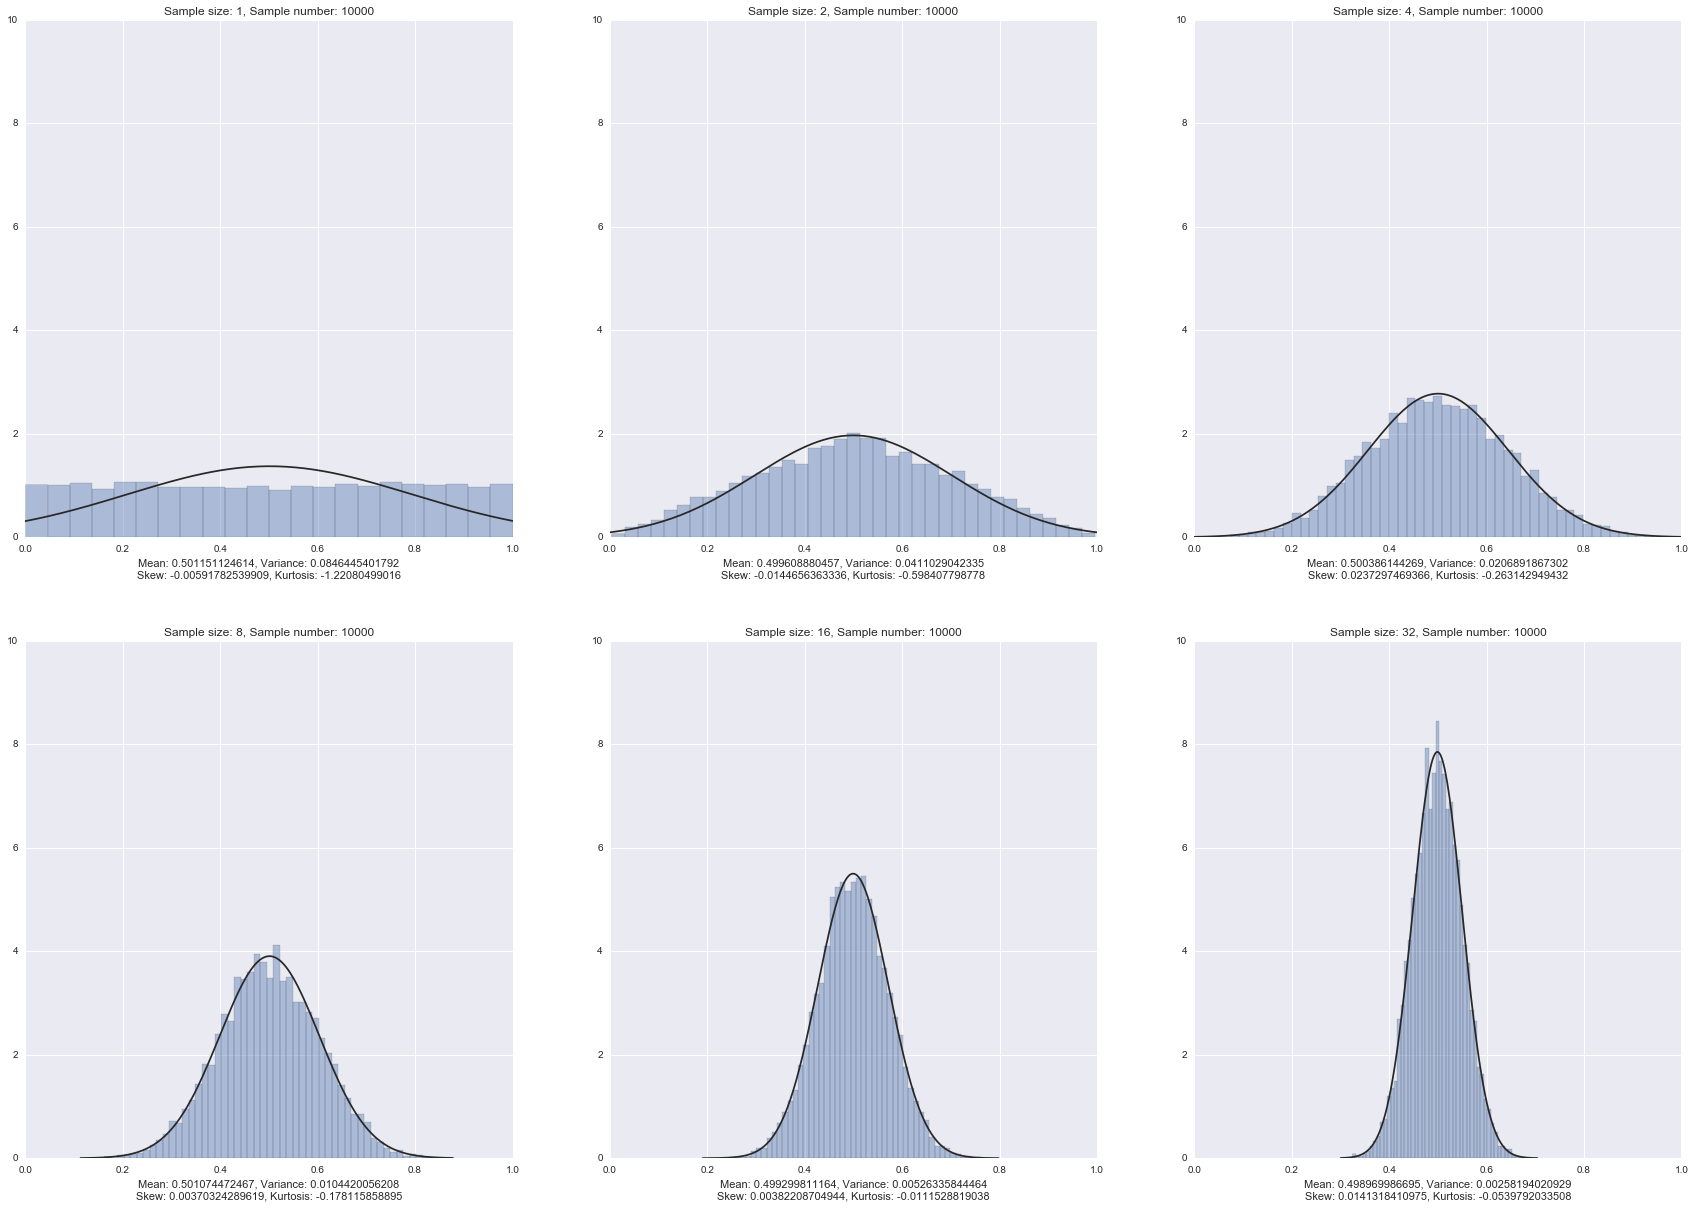

In [5]:
plt.figure()
plt.subplot(2, 3, 1)
plot_histogram(1,10000)
plt.subplot(2, 3, 2)
plot_histogram(2,10000)
plt.subplot(2, 3, 3)
plot_histogram(4,10000)
plt.subplot(2, 3, 4)
plot_histogram(8,10000)
plt.subplot(2, 3, 5)
plot_histogram(16,10000)
plt.subplot(2, 3, 6)
plot_histogram(32,10000)
plt.subplots_adjust(right=3,top=3)
plt.show()

In [6]:
from ipywidgets import interact

<function __main__.plot_histogram>

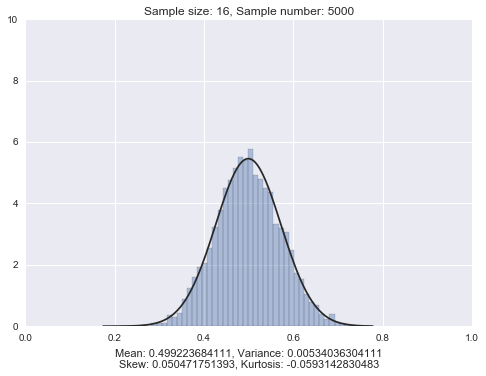

In [7]:
interact(plot_histogram, sample_size=(1,32), sample_number=(1,10000))